<a href="https://colab.research.google.com/github/TIR13/ML1/blob/master/labs/NadarayLowwes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

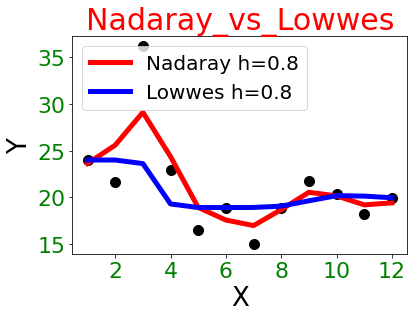

In [2]:
import numpy as np
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
import math

def gaus(r):
    return (2 * math.pi) ** -0.5 * math.exp(-0.5 * r ** 2)

def quad(r):
  if (abs(r) <= 1):
    return (1-r**2)**2
  else:
    return 0

def draw(x, y, y_gaus, y_quad,h1,h2, name="Nadaray Watson"):
    plt.xticks(fontsize=22,c='green')
    plt.yticks(fontsize=22,c='green')
    plt.rcParams["figure.figsize"] = [30,15]
    plt.scatter(x, y, color="black",s=100)
    plt.plot(x, y_gaus, label='Nadaray h='+str(h1), color="red",linewidth=5)
    plt.plot(x, y_quad, label='Lowwes h='+str(h2), color="blue",linewidth=5)
    plt.xlabel('X', fontsize = 26)
    plt.ylabel('Y',fontsize = 26)
    plt.title(name, fontsize=30,color="red")
    plt.legend(loc=2, prop={'size': 20})
    plt.show()

def nadaray_watson(x, y, func, h):
    n = len(x)
    w = []
    for t in range(n):
        w.append([])
        for i in range(n):
            #print(distance.euclidean(x[t], x[i]))
            w[t].append(func(distance.euclidean(x[t], x[i]) / h))
    w = np.array(w)
    #print(w)
    y_nadaray = (w * y[:, None]).sum(axis=0) / w.sum(axis=0)
    return y_nadaray

def lowess(x, y, func, h):
    n = len(x)
    gamma = np.ones(n)
    gamma_old = np.zeros(n)
    while np.abs(sum(gamma) - sum(gamma_old))>=eps:
        w = []
        for t in range(n):
            w.append([])
            for i in range(n):
                w[t].append(func(distance.euclidean(x[t], x[i]) / h)*gamma[t])
        w = np.array(w)
        y_lowess = (w * y[:, None]).sum(axis=0) / w.sum(axis=0)
        err = np.abs(y_lowess - y)
        gamma_old = gamma[:]
        gamma = [quad(err[j]) for j in range(n)]
    return y_lowess
    
eps = 1e-5
h1=0.8
h2=1.5

x=np.arange(1,13)
y = np.asarray([24,21.60,36.20,22.90,16.50,18.90,15.00,18.90,21.70,20.40,18.20,19.90])

y_nadaray_gaus = nadaray_watson(x, y, gaus, h1)
y_nadaray_quad = nadaray_watson(x, y, quad, h2)
#draw(x,y, y_nadaray_gaus,y_nadaray_quad,h1,h2)


h3=1
h4=1.3
y_lowess_gaus = lowess(x, y, gaus, h3)
y_lowess_quad = lowess(x,y, quad, h4);
#draw(x,y, y_lowess_gaus,y_lowess_quad,h1,h2,"Lowwes")

draw(x,y,y_nadaray_gaus, y_lowess_gaus,h1,h1,"Nadaray_vs_Lowwes")

